In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Fungsi untuk menghitung total baris dari file CSV
def count_total_rows(csv_file):
    # Membaca file CSV menggunakan pandas
    df = pd.read_csv(csv_file)
    # Menghitung jumlah total baris
    total_rows = len(df)
    return total_rows

In [15]:
# Fungsi untuk menghitung jumlah pengguna unik berdasarkan IP
def count_unique_users(csv_file):
    # Membaca file CSV menggunakan pandas
    df = pd.read_csv(csv_file)
    # Menghitung jumlah IP unik
    unique_ips = df['IP'].nunique()
    return unique_ips

In [16]:
# Fungsi untuk menghitung frekuensi URL yang paling sering diakses
def most_frequent_urls(csv_file, top_n=10):
    # Membaca file CSV menggunakan pandas
    df = pd.read_csv(csv_file)
    # Menghitung frekuensi URL
    url_counts = df['URL'].value_counts().head(top_n)
    return url_counts

In [22]:
# Fungsi untuk mengonversi waktu dan menghitung frekuensi akses URL berdasarkan waktu
def analyze_url_trend_by_time(csv_file, time_interval='h'):
    # Membaca file CSV menggunakan pandas
    df = pd.read_csv(csv_file)
    
    # Konversi kolom 'Time' menjadi datetime, menghilangkan informasi zona waktu jika tidak diperlukan
    df['Time'] = pd.to_datetime(df['Time'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce').dt.tz_convert(None)
    
    # Kelompokkan data berdasarkan waktu (contoh: per jam 'h', per hari 'D', dsb.)
    df_grouped = df.groupby(df['Time'].dt.to_period(time_interval)).size()
    
    return df_grouped

# Fungsi untuk visualisasi tren akses URL berdasarkan waktu
def plot_url_trend(df_grouped):
    plt.figure(figsize=(10,6))
    df_grouped.plot(kind='line', marker='o')
    plt.title('URL Access Trend by Time')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [23]:
# Fungsi untuk mengonversi waktu dan menghitung distribusi akses per jam
def analyze_access_distribution(csv_file):
    # Membaca file CSV menggunakan pandas
    df = pd.read_csv(csv_file)
    
    # Konversi kolom 'Time' menjadi datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce')
    
    # Ekstraksi jam dari kolom waktu
    df['Hour'] = df['Time'].dt.hour
    
    # Menghitung frekuensi akses per jam
    access_distribution = df['Hour'].value_counts().sort_index()
    
    return access_distribution

# Fungsi untuk visualisasi distribusi akses per jam
def plot_access_distribution(access_distribution):
    plt.figure(figsize=(10,6))
    access_distribution.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Access Time')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Total baris dalam file CSV: 19886265
Jumlah pengguna unik (berdasarkan IP): 1118
URL yang paling sering diakses:
URL
/assets/js/tagmanager.min.js                             359278
/assets/js/bootstrap3-typeahead.min.js                   359259
/assets/select2/dist/js/select2.min.js                   254389
/home                                                    185995
/trx_ranap/permintaandarah/printPermintaandarah/login    177363
/assets/plugins/jquery-upload-file/jquery.form.js        169048
/home/getmenu                                            168925
/home/findmenu                                           168825
/home/home/dashboard                                     168588
/assets/js/datagrid-detailview.js                        164801
Name: count, dtype: int64


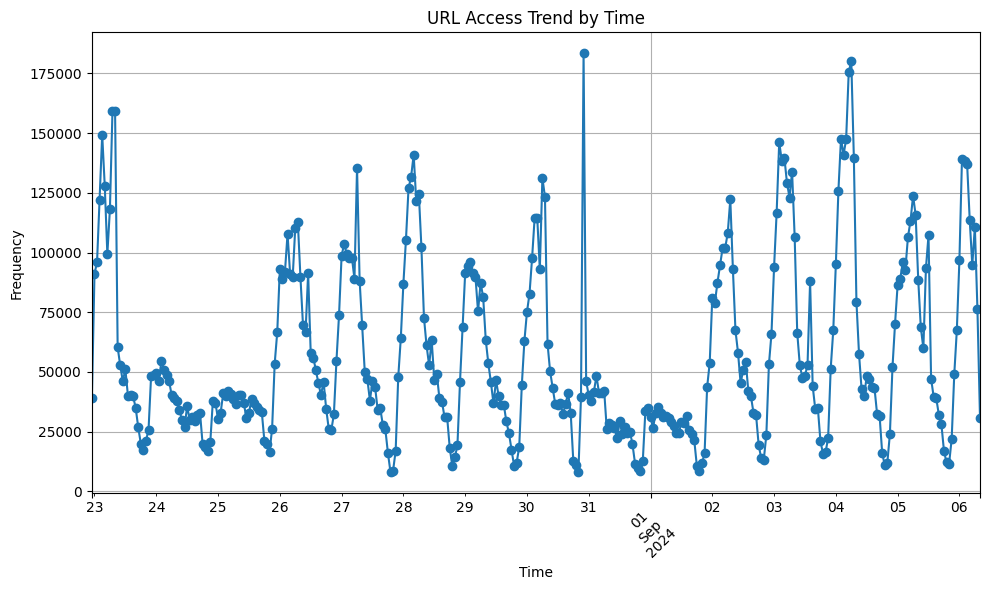

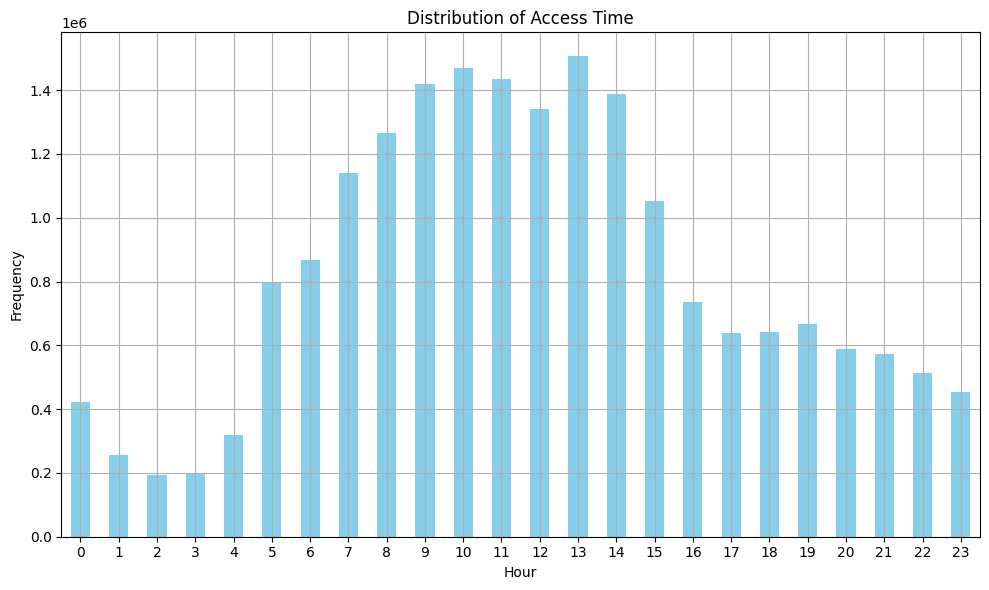

Aktivitas pengguna mencapai puncaknya antara jam 13:00


In [25]:
# Eksekusi utama
csv_file = 'extracted_data.csv'  # Ganti dengan nama file CSV Anda
total_rows = count_total_rows(csv_file)
print(f"Total baris dalam file CSV: {total_rows}")
unique_users = count_unique_users(csv_file)
print(f"Jumlah pengguna unik (berdasarkan IP): {unique_users}")
top_urls = most_frequent_urls(csv_file, top_n=10)
print("URL yang paling sering diakses:")
print(top_urls)
time_interval = 'h'  # Pilihan: 'h' untuk per jam, 'D' untuk per hari, dsb.
# Analisis tren akses URL berdasarkan waktu
df_grouped = analyze_url_trend_by_time(csv_file, time_interval)
plot_url_trend(df_grouped)
access_distribution = analyze_access_distribution(csv_file)
plot_access_distribution(access_distribution)
# Menampilkan waktu puncak aktivitas
peak_hour = access_distribution.idxmax()
print(f"Aktivitas pengguna mencapai puncaknya antara jam {peak_hour}:00")